Prévision des ventes basée sur infos personnelles des clients <br>
Classification binaire

In [33]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [35]:
df = pd.read_csv('Clients_informations.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()


,Genre,Age,Salaire_estimé,acheté_non
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Genre             400 non-null object
Age               400 non-null int64
Salaire_estimé    400 non-null int64
acheté_non        400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [37]:
#257 qui n'ont pas acheté 
#143 qui ont acheté 
df.acheté_non.value_counts()

0    257
1    143
Name: acheté_non, dtype: int64

In [38]:
df.Genre.value_counts()

Female    204
Male      196
Name: Genre, dtype: int64

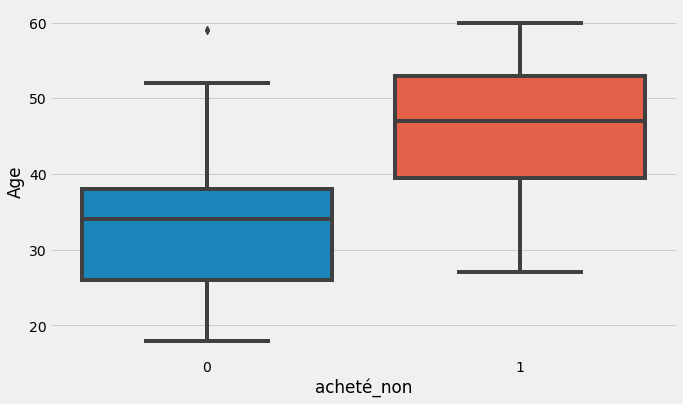

In [39]:
sns.boxplot(y='Age', x='acheté_non', data=df)

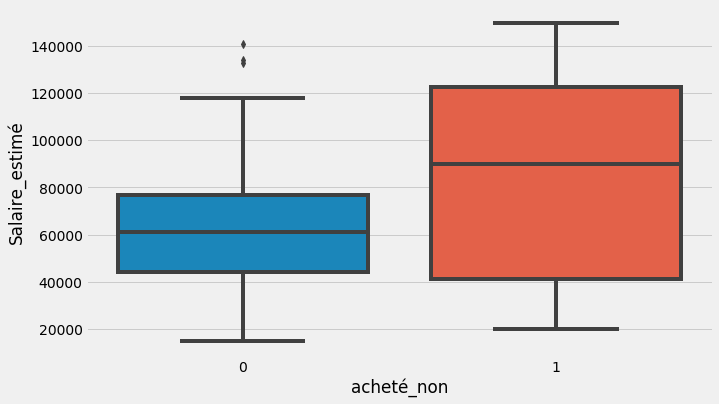

In [40]:
sns.boxplot(y='Salaire_estimé', x='acheté_non', data=df)

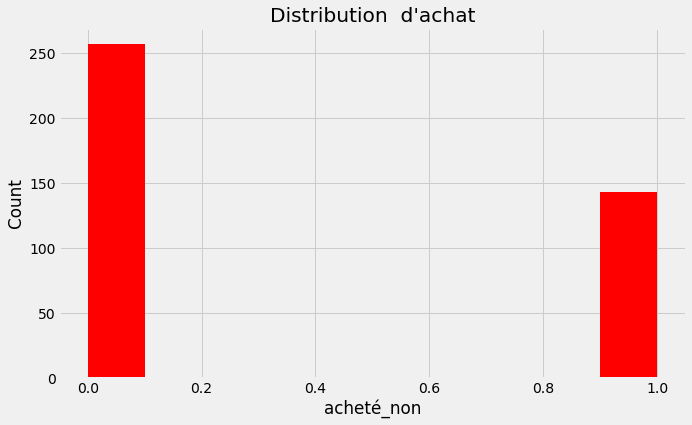

In [48]:
plt.hist(x="acheté_non", data=df,color='red');
plt.title('Distribution  d\'achat');
plt.ylabel('Count');
plt.xlabel('acheté_non');
plt.show()

Par cet histogramme, nous avons une idée claire que les publicités 
des médias sociaux ne permettent pas d'acheter le produit. Dans 
ce carnet, nous allons plonger dans les données et essayer d'en trouver
la raison et de l'explorer plus avant.

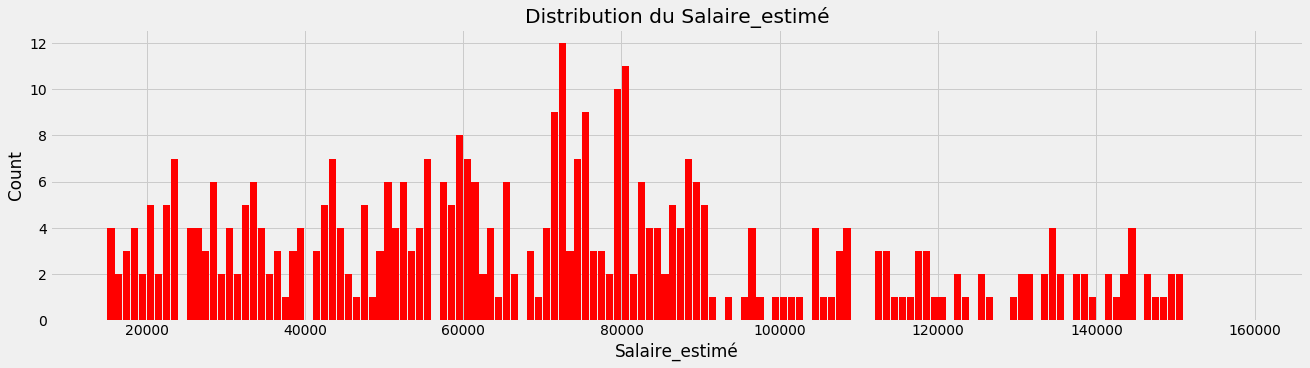

In [47]:
plt.figure(figsize=(20,5))
bins_size = np.arange(15000,150000+10000,1000)
plt.hist(x="Salaire_estimé", data=df, bins= bins_size,rwidth=0.9,color='red');
plt.title('Distribution du Salaire_estimé');
plt.ylabel('Count');
plt.xlabel('Salaire_estimé');

In [50]:
df.Salaire_estimé.mean()

69742.5

Le graphique explique mieux la répartition de chaque niveau de revenu. Il est intéressant de noter que les clients de C-discount ont une fréquence très comparable, leur revenu annuel variant entre environ 75 000 et 80 000 euro. Le salaire moyen des clients est de 69742,5.

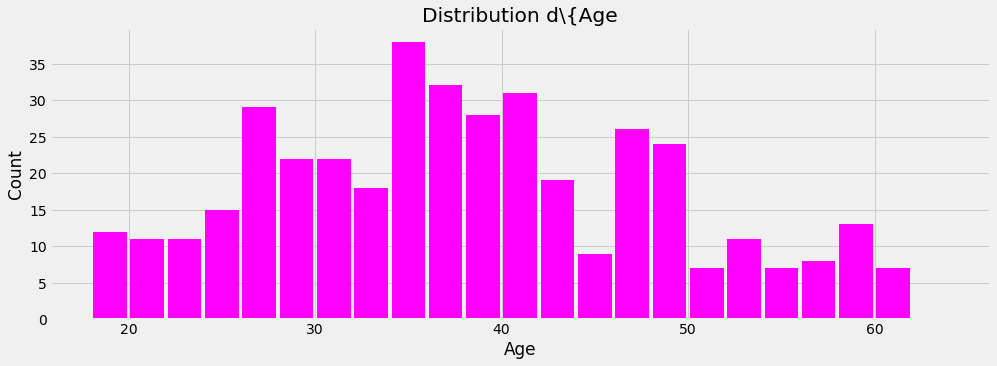

In [54]:
plt.figure(figsize=(15,5))
bins_size = np.arange(18,65,2)
plt.hist(x="Age", data=df, bins= bins_size,rwidth=0.9,color='magenta');
plt.title('Distribution d\{Age');
plt.ylabel('Count');
plt.xlabel('Age');

En regardant le graphique ci-dessus, on peut voir que les âges de 27 à 42 ans sont très fréquents mais il n'y a pas de modèle clair, nous pouvons seulement trouver quelques modèles de groupe, comme les groupes plus âgés sont moins fréquents en comparaison avec les jeunes.

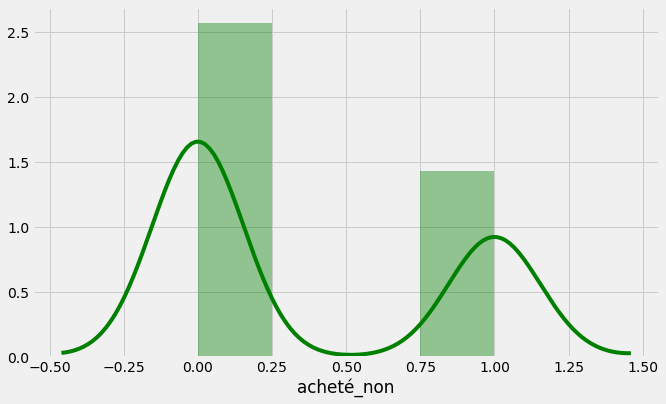

In [56]:
sns.distplot(df.acheté_non,color='green')

In [57]:
df.describe()

,Age,Salaire_estimé,acheté_non
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [58]:
#Extraction des différents age
df.Age.unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [59]:
#Age repeté
df.Age.nunique()

43

In [60]:
df.Salaire_estimé.unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

In [61]:
df.Salaire_estimé.nunique()

117

In [65]:
df.acheté_non.unique()

,Genre,Age,Salaire_estimé,acheté_non
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


(4.0, 0)

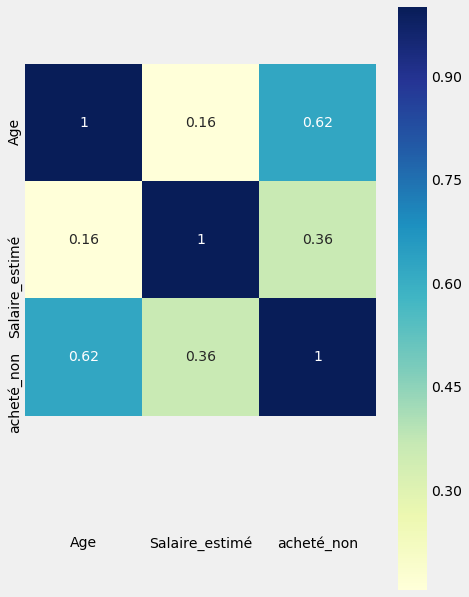

In [73]:
#Matricede corrélation
plt.figure(figsize =(7,10))
ax= sns.heatmap(df.corr(),square = True, annot = True,cmap="YlGnBu")
ax.set_ylim(4.0, 0)

Le graphique ci-dessus montre la corrélation linéaire entre les différents attributs de l'ensemble de données de segmentation de la clientèle.
Cette carte de chaleur reflète les caractéristiques les plus corrélées avec la couleur bleue et les moins corrélées avec la couleur verte. Nous pouvons clairement voir que seul l'âge a une relation linéaire avec l'achat.

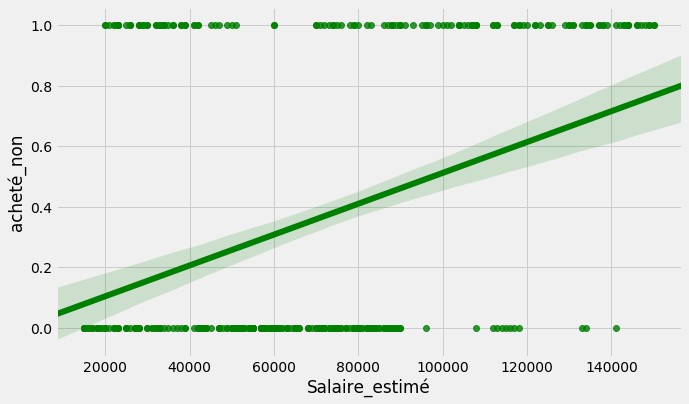

In [86]:
# Regression plot 
ax = sns.regplot(x="Salaire_estimé", y="acheté_non", data=df, color='green')

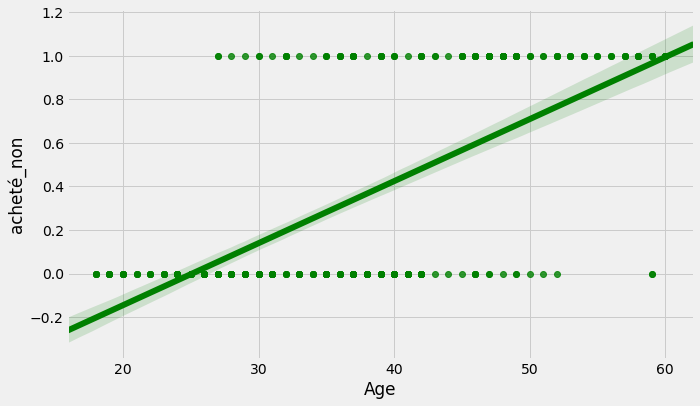

In [87]:
ax = sns.regplot(x="Age", y="acheté_non", data=df,color='green')

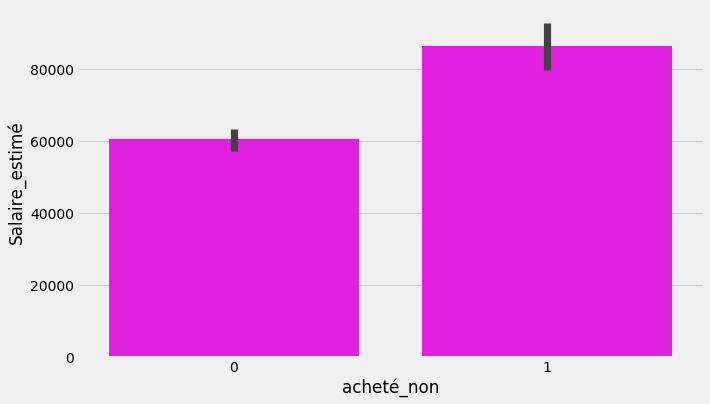

In [91]:
#Bar Plot
sns.barplot(x="acheté_non", y="Salaire_estimé", data=df, color='magenta')

Par ce diagramme à barres, nous pouvons prendre l'idée que la personne qui a acheté le produit a un salaire plus élevé que la moyenne.

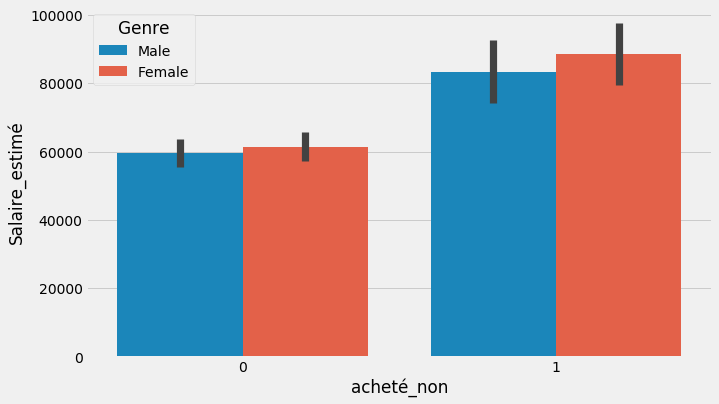

In [92]:
sns.barplot(x="acheté_non", y="Salaire_estimé",hue='Genre', data=df)

les femmes ont un salaire moyen plus élevé.
les femmes ont acheté plus

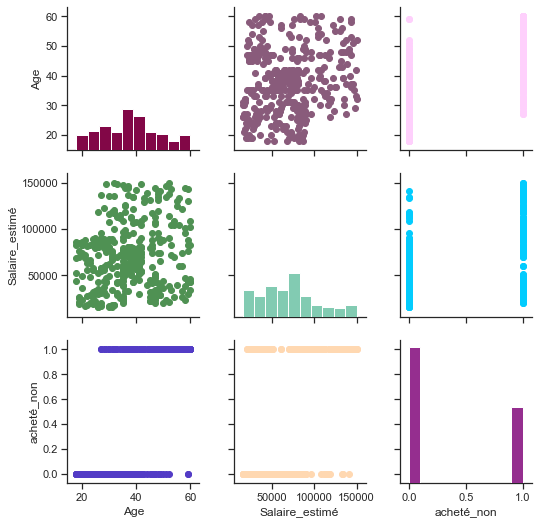

In [100]:
#Pair plot

colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)

g = sns.PairGrid(df, vars=["Age", "Salaire_estimé","acheté_non"])
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

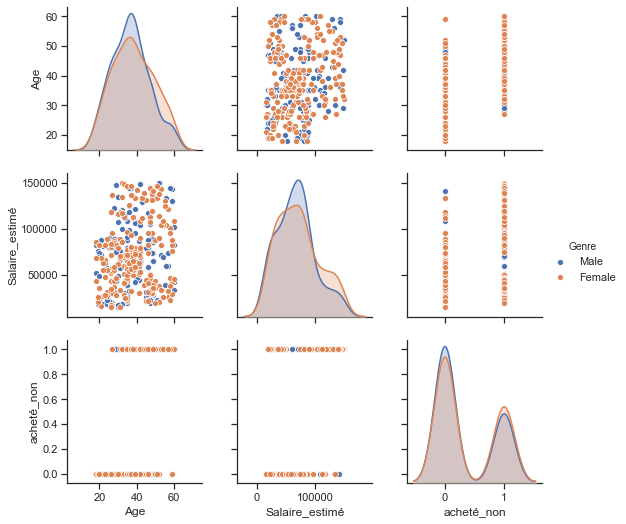

In [101]:
sns.pairplot(df, vars=["Age", "Salaire_estimé","acheté_non"], hue = "Genre")

On va Remplacer les valeurs aberrantes par l'approche respective des tendances centrales(Mean/Median/Mode).

In [102]:
df.loc[((df.Age >58) & (df.acheté_non==0)), 'Age'] = np.nan
df.fillna(53,inplace=True)

In [103]:
df.loc[(df.Salaire_estimé>120000) & (df.acheté_non==0), 'Salaire_estimé'] = np.nan
df.fillna(120000,inplace=True)

Calculer le score Z pour valider si les valeurs aberrantes sont toujours présentes ou non.

In [107]:
from scipy import stats
z = np.abs(stats.zscore(df['Salaire_estimé']))
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [105]:
z = np.abs(stats.zscore(df['Age']))
print(np.where(z > 3))

(array([], dtype=int64),)


On va nettoyer les données en tenant compte des problèmes de formatage, le cas échéant. (conversion des types de données, remplacement des symoble)

In [108]:
df.Age = df.Age.astype("int64")

In [110]:
df.Salaire_estimé = df.Salaire_estimé.astype("int64")

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Genre             400 non-null object
Age               400 non-null int64
Salaire_estimé    400 non-null int64
acheté_non        400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [115]:
a = df.groupby(['Genre', 'Age'])
a.first()

Salaire_estimé  acheté_non
Genre  Age                            
Female 18            44000           0
       19            21000           0
       20            23000           0
       21            16000           0
       22            63000           0
...                    ...         ...
Male   56           133000           1
       57            74000           1
       58           144000           1
       59           143000           1
       60           102000           1

[83 rows x 2 columns]

In [116]:
a = df.groupby(['acheté_non','Salaire_estimé'])
a.first()

Genre  Age
acheté_non Salaire_estimé             
0          15000             Male   30
           16000           Female   21
           17000           Female   27
           18000             Male   32
           19000             Male   19
...                           ...  ...
1          146000          Female   51
           147000          Female   35
           148000            Male   29
           149000          Female   33
           150000          Female   32

[164 rows x 2 columns]

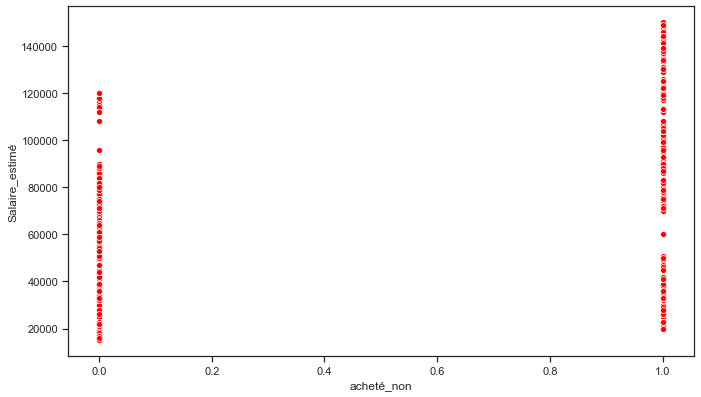

In [118]:
sns.scatterplot(y="Salaire_estimé", x="acheté_non", data=df,color='red')


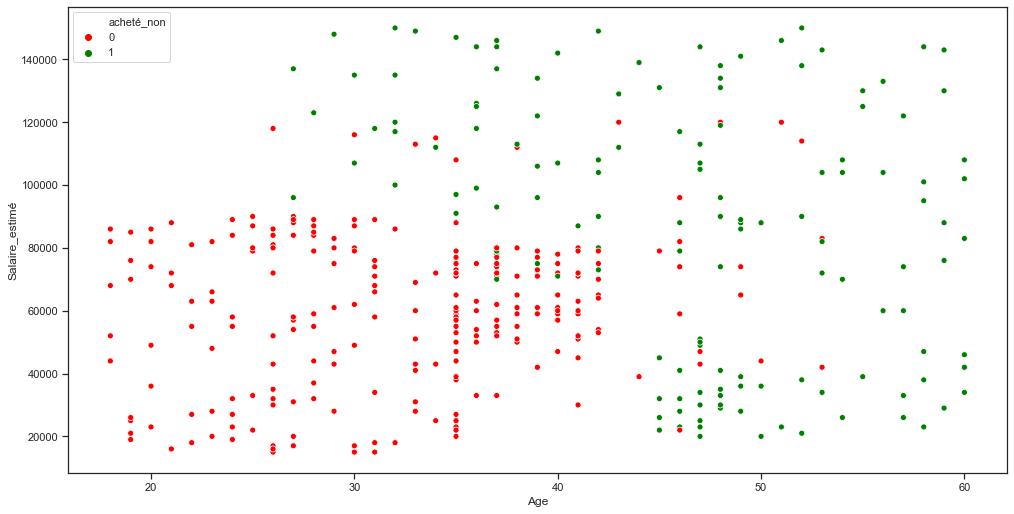

In [128]:
plt.figure(figsize = (15,8))
sns.scatterplot(y="Salaire_estimé", x="Age", data=df, markers='<',hue = 'acheté_non',palette=sns.color_palette(['red', 'green']))

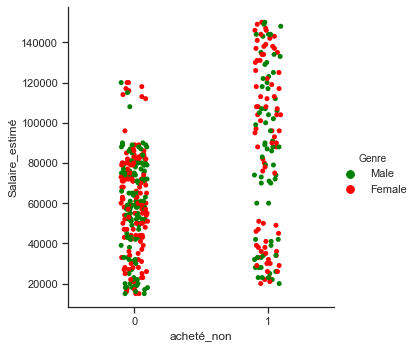

In [125]:
sns.catplot(y="Salaire_estimé", x="acheté_non", data=df, hue = 'Genre',palette=sns.color_palette(['green', 'red']))

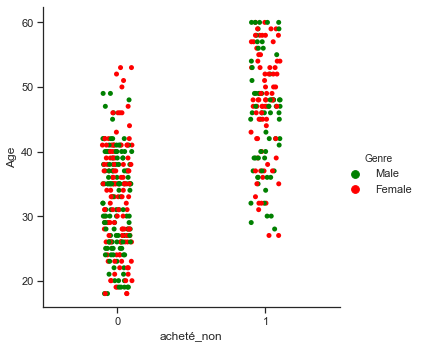

In [131]:
sns.catplot(y="Age", x="acheté_non", data=df, hue = 'Genre',palette=sns.color_palette(['green', 'red']))

Classification + matrice de confusion + CUA + Score F1 + précision + recall + accuracy

In [141]:
df.Genre.replace({'Male':1,
                   'Female':0}, inplace=True)

In [142]:
df.head()

,Genre,Age,Salaire_estimé,acheté_non
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<p> Standarisation des variables <br>
Comme le classificateur KNN prédit la classe d'une observation de test donnée en identifiant les observations qui lui sont les plus proches, l'échelle des variables importe. Toute variable à grande échelle aura un effet beaucoup plus important sur la distance entre les observations, et donc sur le classificateur KNN, que les variables à petite échelle.

In [157]:
X = df.iloc[:, [1, 2]]
y = df.iloc[:, 3]

In [158]:
x

,Age,Salaire_estimé
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [159]:
#KNN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [160]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[61  7]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        68
           1       0.81      0.94      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100



In [167]:
#Choisir un K
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

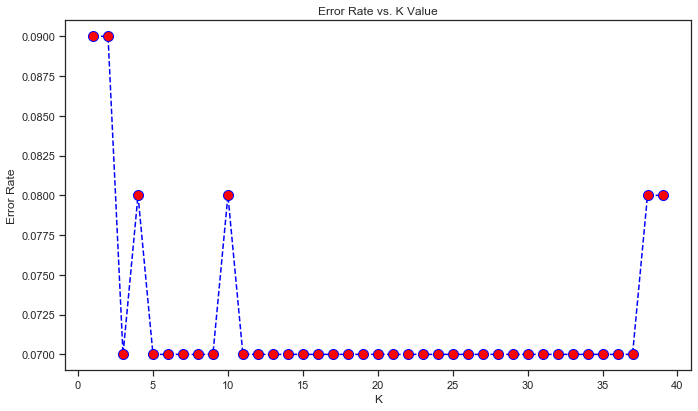

In [168]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

On peut voir ici qu'après avoir atteint K>4, le taux d'erreur diminue et si l'on prend les valeurs qui ont provoqué l'overfitting, Donc, on va re-trainer le modèle avec cela et vérifions le rapport de classification !

In [170]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('Avec K=4')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

Avec K=4


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [173]:
from sklearn.metrics import accuracy_score
print ('accuracy pour knn, avec k = 4 : ', accuracy_score(y_test,knn_pred))

accuracy pour knn, avec k = 4 :  0.92


K fold Cross Validation <br>
Cette technique est utile pour évaluer plus précisément les biais et la variance. Elle divise l'ensemble d'entraînement en k groupes, et à chaque itération, l'algorithme choisit different test fold. pour le test. Cela permet d'utiliser chaque partie de l'ensemble d'entraînement pour les tests.

In [174]:
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn,X,y, cv = 5)

In [178]:
knn_accuracy

array([0.8125, 0.8875, 0.75  , 0.7375, 0.675 ])

In [180]:
knn_accuracy.mean()

0.7725

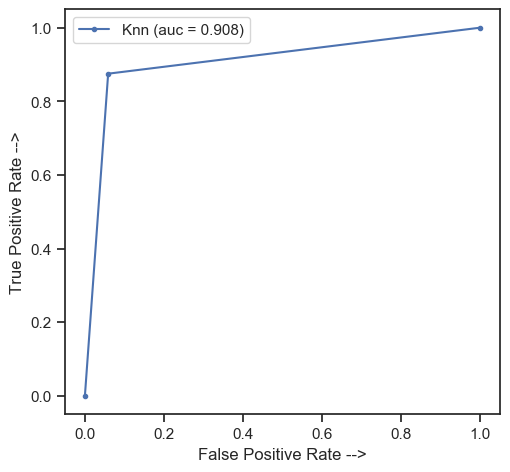

In [183]:

#Receiver operating characteristic 
from sklearn.metrics import roc_curve, auc
knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Logistic regression

In [184]:
from sklearn.linear_model import LogisticRegression
log_reg  = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [185]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[65  3]
 [ 8 24]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [186]:
log_accuracy = cross_val_score(log_reg,X,y, cv = 5)
print(log_accuracy)
print("mean value of accuracy",log_accuracy.mean())

[0.65   0.65   0.6375 0.6375 0.65  ]
mean value of accuracy 0.645


## SVM

In [187]:

from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

In [188]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [189]:
#K- Fold Cross validation
svc_accuracy = cross_val_score(svc_classifier,X,y, cv = 5)
print(svc_accuracy)
print("mean value of accuracy",svc_accuracy.mean())

[0.8125 0.8625 0.7375 0.8125 0.6375]
mean value of accuracy 0.7725


## Decision Tree Classifier

In [191]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [192]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[62  6]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [193]:
#K- Fold Cross validation
dt_accuracy = cross_val_score(dt_classifier,X,y, cv = 5)
print(dt_accuracy)
print("mean value of accuracy",dt_accuracy.mean())

[0.75   0.925  0.875  0.75   0.7875]
mean value of accuracy 0.8174999999999999


## Random Forest Classification

In [194]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [195]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[63  5]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [196]:
#K- Fold Cross validation
dt_accuracy = cross_val_score(rf_classifier,X,y, cv = 5)
print(dt_accuracy)
print("mean value of accuracy",dt_accuracy.mean())

[0.775  0.95   0.925  0.8    0.8375]
mean value of accuracy 0.8575000000000002


En voyant la matrice de confusion et le score de précision, le classificateur Random Forest fait mieux que les autres.

#### Comparer les erreurs et choisir l'idéal avec le moins d'erreurs

Effectuer un réglage des hyperparamètres sur tous les modèles et choisir les meilleurs paramètres (un minimum de 2 paramètres doivent être réglés) et les choisir

In [199]:
# Pour SVM
#Applying grid search
from sklearn.model_selection import GridSearchCV
parameters      = [{"C": [1, 10, 100, 1000], "kernel": ['linear']}, 
              {"C": [1, 10, 100, 1000], "kernel": ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001]}]

#Use this list to train
grid_search     = GridSearchCV(estimator = svc_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search     = grid_search.fit(X_train, y_train)

#Use attributes of grid_search to get the results
best_accuracy   = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best accuracy: ",best_accuracy)
print(best_parameters)

Best accuracy:  0.9033333333333333
{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [200]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, C =10, gamma=0.1)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

In [201]:
print("For SVM Classifier::")
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

For SVM Classifier::
[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [202]:
# Pour Random Forest Classification
n_estimators     = [100, 300, 500]
max_depth        = [5, 8, 15]
min_samples_leaf = [1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,min_samples_leaf = min_samples_leaf)

gridF  = GridSearchCV(rf_classifier, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF  = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   30.9s finished


In [203]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [204]:
bestF.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=5,min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [207]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [208]:
#Pour Decision Tree Classifier
criterion  = ['gini', 'entropy']
max_depth  = [4,6,8,12]

parameters = dict(criterion=criterion,max_depth=max_depth)

  
clf        = GridSearchCV(rf_classifier, hyperF, cv = 5, verbose = 1, n_jobs = -1)

# Fit the grid search
clf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   28.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [209]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_pred       = dt_classifier.predict(X_test)

In [210]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[65  3]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



In [211]:
#Pour Logistic Regression
param_grid = [    
    {'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf      = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished


In [212]:
a = best_clf.best_estimator_
a

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
best_clf.best_params_

{'max_iter': 100, 'solver': 'lbfgs'}

In [214]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, solver='lbfgs',max_iter=100 )
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [215]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[65  3]
 [ 8 24]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [216]:
#Pour KNN 
#List Hyperparameters that we want to tune.
leaf_size   = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use GridSearch
clf        = GridSearchCV(knn, hyperparameters, cv=10, verbose=True, n_jobs=-1)

#Fit the model
best_model = clf.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    3.9s finished


In [217]:
best_model.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='uniform')

In [218]:
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 9, 'p': 1}

In [219]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



Maintenant, On compare les modèles et on choisit le modèle idéal.

Par le réglage de l'hyperparamètre Arbre de décision est le meilleur algorithme

In [220]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[65  3]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.91      0.91      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.94      0.94      0.94       100



On va prédire la cible avec un maximum de fonctions indépendantes.

In [224]:
X1 = df.iloc[:,0: 3]
y1 = df.iloc[:, 3]
X1

,Genre,Age,Salaire_estimé
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

### Decision Tree

In [226]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_pred       = dt_classifier.predict(X_test)

In [249]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[73  6]
 [ 4 37]]


              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [321]:
#Premier element dans le test set
list(X_test.iloc[1])

[0, 38, 50000]

In [331]:
x_predict = [[1, 38, 60000]]
x_predict

if(dt_classifier.predict(x_predict) == 0):
    print("Le client va pas commander le nouveau produit")
else:
    print("Le client va commander le nouveau produit")

Le client va pas commander le nouveau produit
